## PyTorch Multiclass Classification Problem

In this example we will see how to predict models that have multiple classes and how to use the softmax function and the cross entropy loss function to reduce the loss and get a model that predicts the class accurately

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Creating a toy multiclass dataset and splitting it

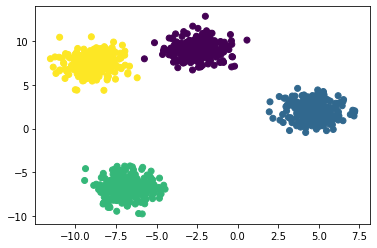

In [29]:
# Defining the Dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
NUM_SAMPLES = 1000
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples= NUM_SAMPLES,
                            n_features= NUM_FEATURES,
                            centers= NUM_CLASSES,
                            random_state= RANDOM_SEED
                            )

# 2. Convert the data into tensors
X_tensor = torch.from_numpy(X_blob).to(torch.float)
y_tensor = torch.from_numpy(y_blob).to(torch.long)

# 3. Split the data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X_tensor,y_tensor,test_size=0.2,random_state=RANDOM_SEED)

# 4. Visualise the data by plotting it
plt.scatter(x=X_blob[:,0],y=X_blob[:,1],c= y_blob)

### Step 2: Create an ANN Model for the Multiclass Problem

In [45]:
class BlobsClassficationV0(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.input = nn.Linear(2,32)
        self.hidden = nn.Linear(32,32)
        self.relu = nn.ReLU()
        self.output = nn.Linear(32,4)
    
    def forward(self,x):
        return self.output(self.relu(self.hidden(self.relu(self.input(x)))))

In [46]:
model_0 = BlobsClassficationV0()

model_0

BlobsClassficationV0(
  (input): Linear(in_features=2, out_features=32, bias=True)
  (hidden): Linear(in_features=32, out_features=32, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=32, out_features=4, bias=True)
)

In [47]:
def computeAccuracy(y_true,y_pred):
    accuracy = (y_true == y_pred).to(torch.float).sum()/len(y_true)
    return accuracy * 100

In [48]:
def trainModelV0():
    epochs = 10000
    learning_rate = 0.05

    loss_fn = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(model_0.parameters(),lr=learning_rate)

    for epoch in range(epochs):

        y_logits = model_0(X_train) 
        y_preds = torch.argmax(torch.softmax(y_logits,dim=1),dim=1)

        loss = loss_fn(y_logits,y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Testing 
        model_0.eval()
        with torch.inference_mode():
            if epoch%1000 == 0:
                accuracy = computeAccuracy(y_train,y_preds)
                y_test_logits = model_0(X_test)
                y_test_preds = torch.argmax(torch.softmax(y_test_logits,dim=1),dim=1)
                test_accuracy = computeAccuracy(y_test,y_test_preds)
                print(f'Epoch: {epoch} | Training Loss: {loss} | Training Accuracy: {accuracy} | Testing Accuracy: {test_accuracy} ')
        

In [49]:
trainModelV0()

Epoch: 0 | Training Loss: 1.6537184715270996 | Training Accuracy: 25.125 | Testing Accuracy: 53.500003814697266 
Epoch: 1000 | Training Loss: 0.0023669900838285685 | Training Accuracy: 99.875 | Testing Accuracy: 100.0 
Epoch: 2000 | Training Loss: 0.001753041404299438 | Training Accuracy: 99.875 | Testing Accuracy: 100.0 
Epoch: 3000 | Training Loss: 0.001506348722614348 | Training Accuracy: 100.0 | Testing Accuracy: 100.0 
Epoch: 4000 | Training Loss: 0.0013561333762481809 | Training Accuracy: 100.0 | Testing Accuracy: 100.0 
Epoch: 5000 | Training Loss: 0.00124732858967036 | Training Accuracy: 100.0 | Testing Accuracy: 100.0 
Epoch: 6000 | Training Loss: 0.0011611146619543433 | Training Accuracy: 100.0 | Testing Accuracy: 100.0 
Epoch: 7000 | Training Loss: 0.0010890488047152758 | Training Accuracy: 100.0 | Testing Accuracy: 100.0 
Epoch: 8000 | Training Loss: 0.001026709214784205 | Training Accuracy: 100.0 | Testing Accuracy: 100.0 
Epoch: 9000 | Training Loss: 0.0009715198539197445

In [42]:
y_logits = model_0(X_train)
y_logits = torch.argmax(torch.softmax(y_logits,dim=1),dim=1)

y_logits

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 3, 2, 3, 2, 1, 1, 3, 2, 2, 2, 3, 1,
        3, 2, 3, 0, 1, 0, 0, 1, 1, 3, 0, 2, 2, 1, 1, 3, 1, 1, 2, 3, 3, 0, 0, 0,
        1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 3, 1, 0, 2, 1, 3, 2, 2, 2, 1, 0, 2,
        3, 1, 1, 1, 2, 0, 0, 1, 2, 3, 1, 3, 3, 2, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1,
        3, 1, 2, 1, 3, 3, 3, 0, 2, 1, 2, 3, 1, 1, 2, 0, 3, 3, 2, 0, 2, 0, 3, 2,
        0, 0, 2, 2, 0, 1, 2, 0, 3, 3, 2, 3, 2, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2,
        3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 2, 2, 0, 0, 3, 0, 3, 3, 3, 0, 2, 0, 1,
        2, 2, 2, 3, 0, 1, 1, 0, 1, 2, 0, 3, 2, 1, 3, 2, 3, 0, 3, 1, 1, 2, 2, 2,
        2, 2, 2, 0, 3, 3, 2, 1, 1, 2, 3, 1, 0, 0, 1, 3, 0, 1, 3, 3, 2, 3, 3, 3,
        1, 0, 0, 1, 0, 3, 2, 1, 0, 3, 0, 0, 3, 1, 0, 1, 0, 2, 2, 0, 0, 3, 3, 2,
        0, 2, 0, 3, 1, 3, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 3, 1, 1, 0, 2,
        2, 3, 1, 0, 1, 2, 3, 1, 2, 0, 3, 1, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 1, 0,
        2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 3,

In [44]:
y_logits.shape, y_train.shape

(torch.Size([800]), torch.Size([800]))

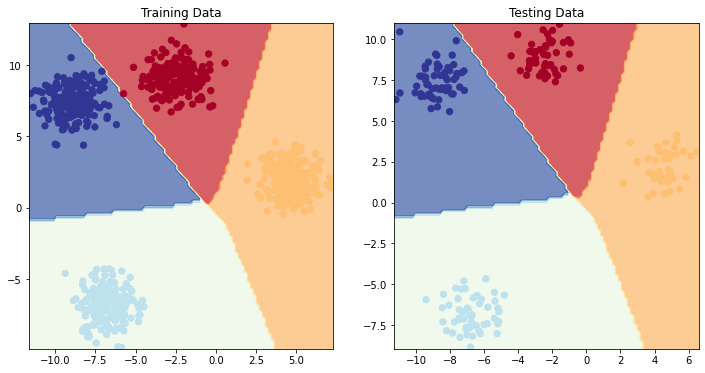

In [53]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training Data')
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing Data')
plot_decision_boundary(model_0,X_test,y_test)